In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/originalData.csv')
df.head()

,Unnamed: 0,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2L/100km,9.0L - 9.5L/100km,43880
1,1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6L/100km,9.0L/100km,36486
2,2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0L/100km,8.6L/100km,40888
3,3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0L/100km,8.6L/100km,44599
4,4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3L/100km,9.1L/100km,46989


In [3]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.shape

(24198, 16)

In [4]:
df.dtypes

,0
Year,int64
Make,object
Model,object
Kilometres,object
Body Type,object
Engine,object
Transmission,object
Drivetrain,object
Exterior Colour,object
Interior Colour,object


In [5]:
df.dropna(subset=[' City',' Highway'],inplace=True)

mask = df[' City'].str.contains('L')
df.loc[mask, ' City'] = df.loc[mask, ' City'].str.replace('L', '', n=1).str.replace('/100km', '')

mask = df[' Highway'].str.contains('L')
df.loc[mask, ' Highway'] = df.loc[mask, ' Highway'].str.split('L').str[0]


df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [6]:
df[' City'] = df[' City'].str.replace('[^0-9.]', '', regex=True).str.split('.', n=2).str[0] + '.' + df[' City'].str.replace('[^0-9.]', '', regex=True).str.split('.', n=2).str[1]
df[' City'] = df[' City'].astype(float)
df[' Highway'] = df[' Highway'].str.replace('[^0-9.]', '', regex=True).str.split('.', n=2).str[0] + '.' + df[' Highway'].str.replace('[^0-9.]', '', regex=True).str.split('.', n=2).str[1]
df[' Highway'] = df[' Highway'].astype(float)
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,12.2,9.0,43880
1,2018,Acura,MDX,77127 km,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,12.6,9.0,36486
2,2019,Acura,RDX,33032 km,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,11.0,8.6,40888
3,2020,Acura,RDX,50702 km,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,11.0,8.6,44599
4,2021,Acura,RDX,67950 km,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,11.3,9.1,46989


In [7]:
df.shape

(17835, 16)

In [8]:
df.dropna(subset=['Kilometres'],inplace=True)
df['Kilometres'] = df['Kilometres'].str.replace('km', '').astype(int)
df['Kilometres'] = df['Kilometres'].astype(float)
df.dtypes

,0
Year,int64
Make,object
Model,object
Kilometres,float64
Body Type,object
Engine,object
Transmission,object
Drivetrain,object
Exterior Colour,object
Interior Colour,object


In [9]:
df[' Highway'] = df[' Highway'] / 10
df[' City'] = df[' City'] / 10
df.head()

,Year,Make,Model,Kilometres,Body Type,Engine,Transmission,Drivetrain,Exterior Colour,Interior Colour,Passengers,Doors,Fuel Type,City,Highway,Price
0,2019,Acura,MDX,53052.0,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Majestic Black Pearl,Red,NaN,NaN,Gas,1.22,0.90,43880
1,2018,Acura,MDX,77127.0,SUV,V6 Cylinder Engine,9 Speed Automatic,AWD,Modern Steel Metallic,Black,NaN,NaN,Gas,1.26,0.90,36486
2,2019,Acura,RDX,33032.0,SUV,2.0L 4cyl,10 Speed Automatic,AWD,White Diamond Pearl,Black,5.0,4,Premium Unleaded,1.10,0.86,40888
3,2020,Acura,RDX,50702.0,SUV,4 Cylinder Engine,NaN,AWD,Platinum White Pearl,Black,NaN,NaN,Gas,1.10,0.86,44599
4,2021,Acura,RDX,67950.0,SUV,4 Cylinder Engine,NaN,AWD,Apex Blue Pearl,Red,NaN,NaN,Gas,1.13,0.91,46989


In [10]:
def fetch_model(text):
  if 'MDX' in text:
    return 'MDX'
  elif 'TCX' in text:
    return 'TCX'
  elif 'Grand' in text:
    return 'Grand'
  elif 'Civic' in text:
    return 'Civic'
  elif 'RDX' in text:
    return 'RDX'
  elif 'ILX' in text:
    return 'ILX'
  elif 'TLX' in text:
    return 'TLX'
  else:
    return 'Other Model'

In [11]:
df['Model'] = df['Model'].apply(fetch_model)

<Axes: xlabel='Model'>

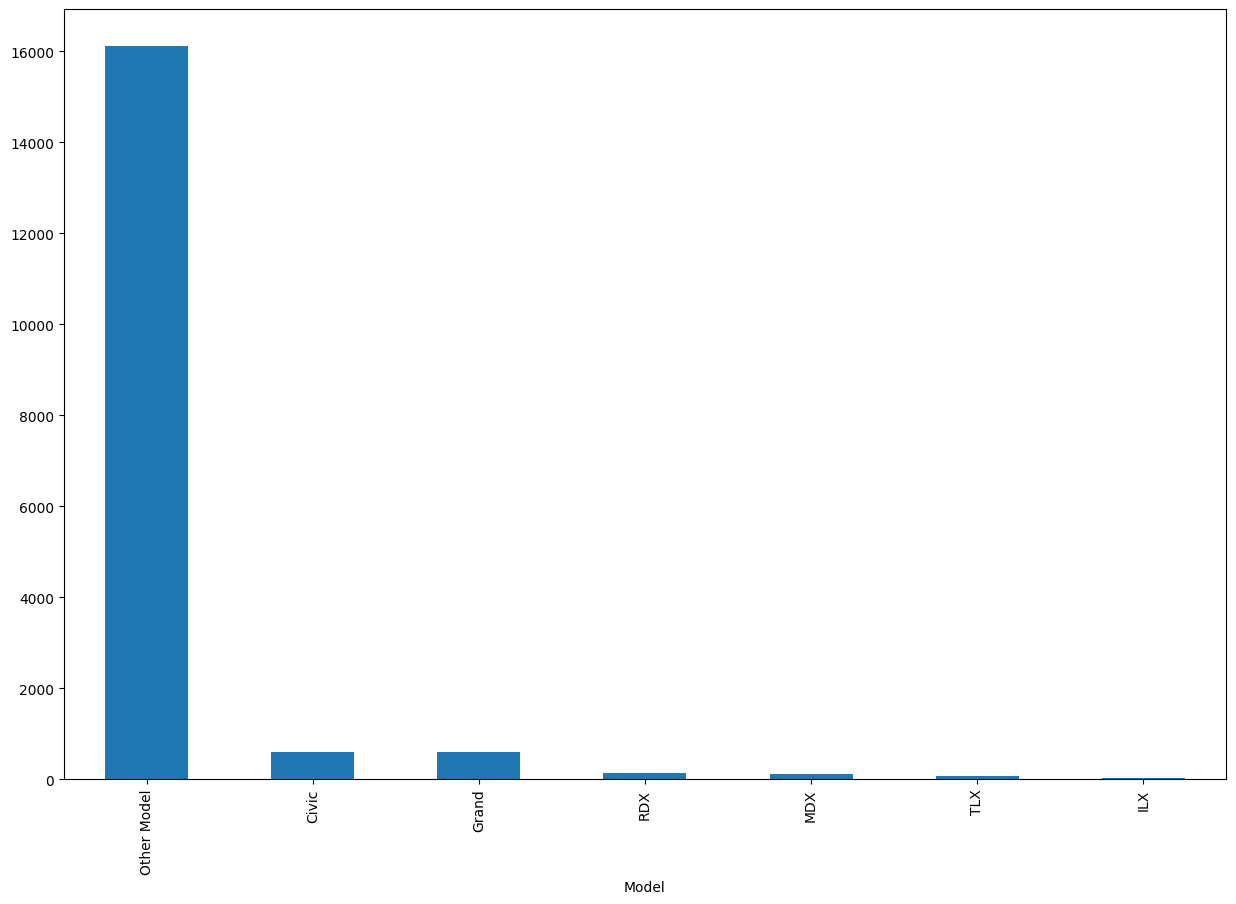

In [12]:
plt.figure(figsize=(15,10))
df['Model'].value_counts().plot(kind='bar')

In [13]:
df.drop([' Exterior Colour',' Interior Colour'],inplace=True,axis=1)
df.shape

(17662, 14)

In [14]:
def segment_make(make):
  if make in ['Acura', 'Alfa Romeo', 'Audi', 'Bentley', 'BMW', 'Cadillac', 'Genesis', 'Infiniti', 'Jaguar', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'McLaren', 'Mercedes-Benz', 'Porsche', 'Rolls-Royce', 'Tesla']:
    return 'Luxury'
  elif make in ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'GMC', 'Jeep', 'Ram']:
    return 'Mainstream'
  elif make in ['Ferrari', 'Lotus']:
    return 'Sports'
  elif make in ['Honda', 'Hyundai', 'Kia', 'Mazda', 'Mitsubishi', 'Nissan', 'Subaru', 'Toyota', 'Volkswagen']:
    return 'Value'
  else:
    return 'Other'

In [15]:
df['Make'] = df['Make'].apply(segment_make)

<Axes: xlabel='Make'>

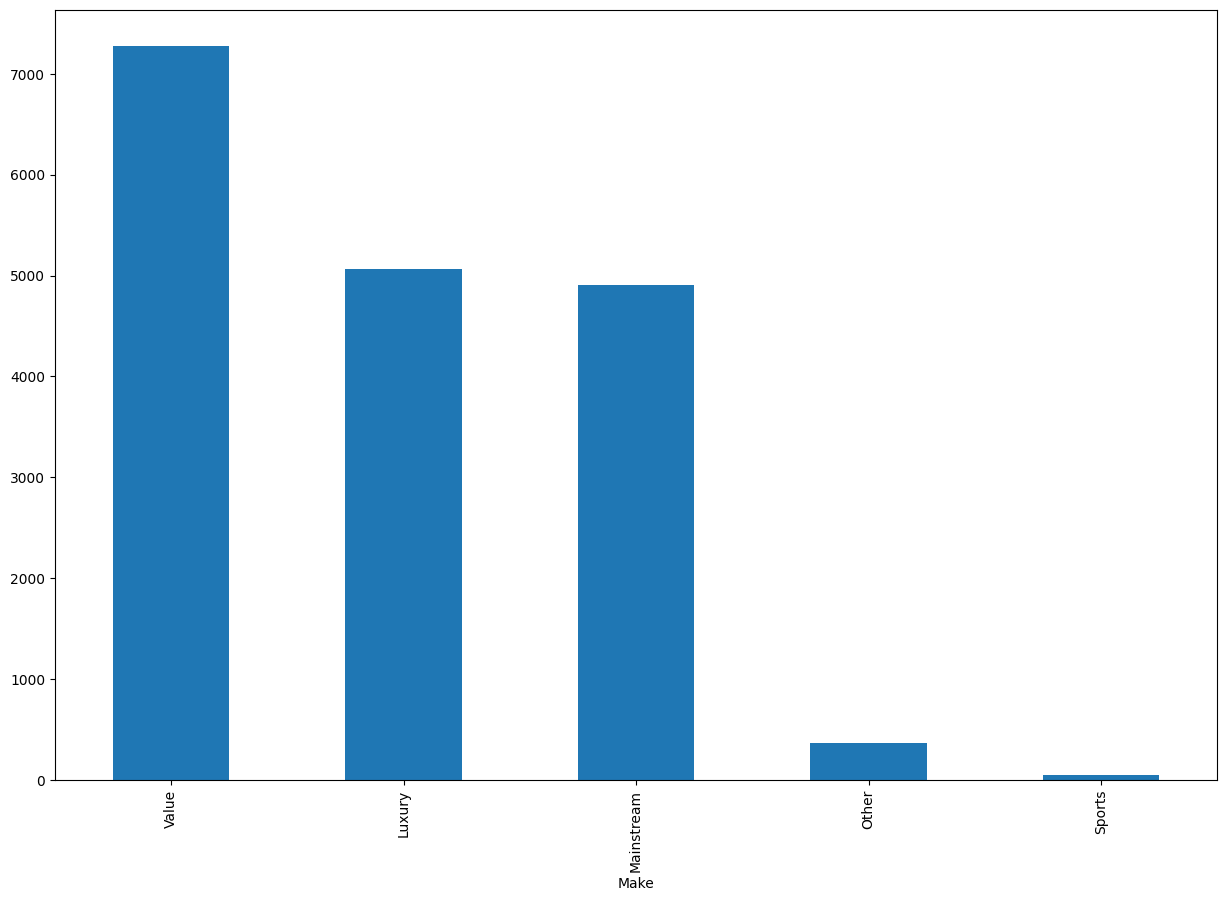

In [16]:
plt.figure(figsize=(15,10))
df['Make'].value_counts().plot(kind='bar')

In [17]:
suv = ['SUV']
sedan = ['Sedan','Coupe','Convertible']
hatchback = ['Hatchback']
wagon = ['Wagon', 'Station Wagon']
truck = ['Truck', 'Truck Extended Cab', 'Extended Cab', 'Crew Cab',
         'Regular Cab', 'Truck Crew Cab', 'Super Cab', 'Quad Cab',
         'Truck Super Cab', 'Truck Double Cab', 'Truck King Cab',
         'Truck Long Crew Cab']
van = ['Van Regular', 'Van Extended']
minivan = ['Minivan']
roadster = ['Roadster']
cabriolet = ['Cabriolet']
super_crew = ['Super Crew']
compact = ['Compact']

body_type_segments = {}
for body_type in df['Body Type'].unique():
  if body_type in suv:
    body_type_segments[body_type] = 'SUV'
  elif body_type in sedan:
    body_type_segments[body_type] = 'Sedan'
  elif body_type in hatchback:
    body_type_segments[body_type] = 'Hatchback'
  elif body_type in wagon:
        body_type_segments[body_type] = 'Wagon'
  elif body_type in truck:
        body_type_segments[body_type] = 'Truck'
  elif body_type in van:
        body_type_segments[body_type] = 'Van'
  elif body_type in minivan:
        body_type_segments[body_type] = 'Minivan'
  elif body_type in roadster:
        body_type_segments[body_type] = 'Roadster'
  elif body_type in cabriolet:
        body_type_segments[body_type] = 'Cabriolet'
  elif body_type in super_crew:
        body_type_segments[body_type] = 'Super Crew'
  elif body_type in compact:
        body_type_segments[body_type] = 'Compact'
  else:
        body_type_segments[body_type] = 'Other'


df['Body Type'] = df['Body Type'].map(body_type_segments)

<Axes: xlabel='Body Type'>

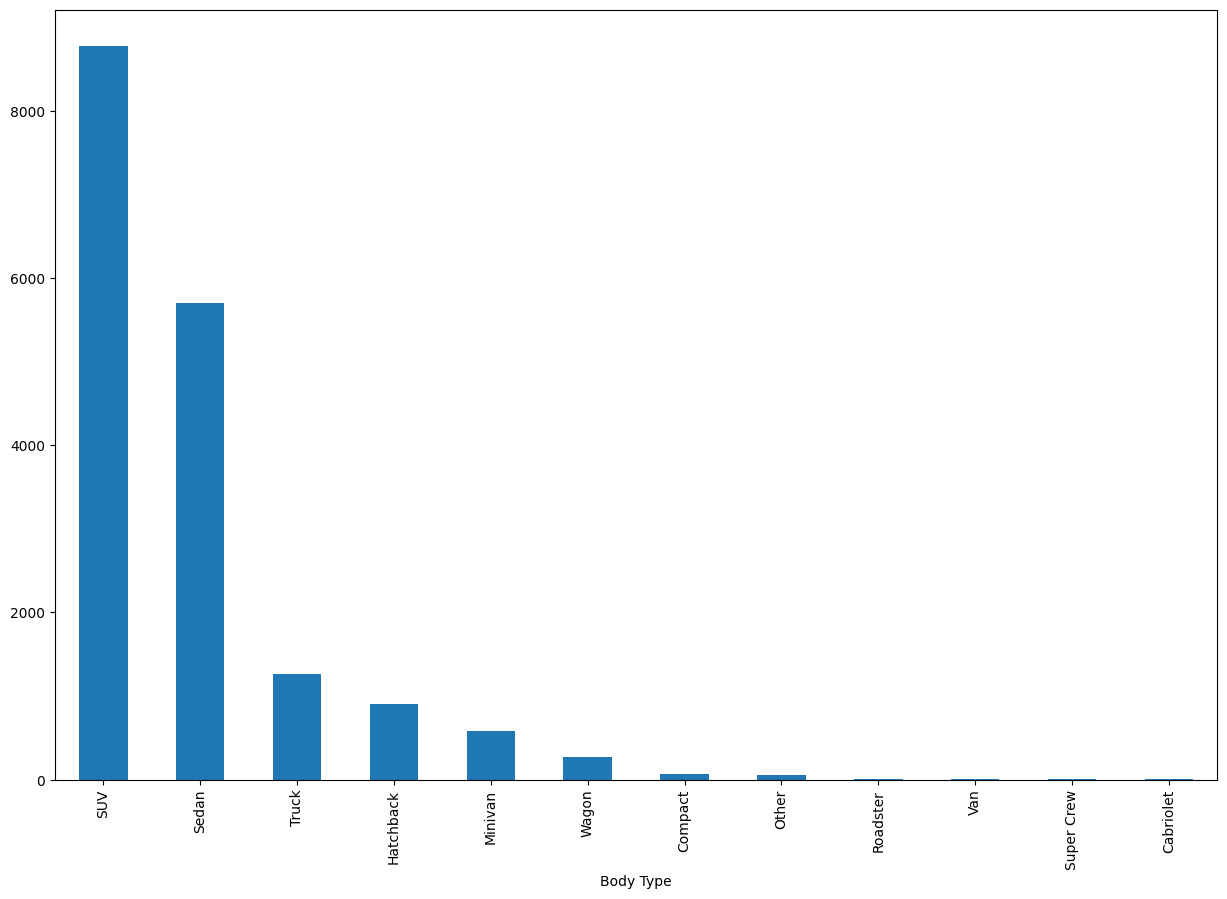

In [18]:
plt.figure(figsize=(15,10))
df['Body Type'].value_counts().plot(kind='bar')

In [19]:
def segment_transmission(transmission):
    if transmission in ['Automatic', 'CVT', '1 Speed Automatic']:
        return 'Automatic'
    elif transmission in ['6 Speed Manual', '5 Speed Manual', '7 Speed Manual']:
        return 'Manual'
    elif transmission in ['9 Speed Automatic', '10 Speed Automatic', '8 Speed Automatic', '7 Speed Automatic', '5 Speed Automatic', '4 Speed Automatic']:
        return 'Traditional Automatic'
    elif transmission in ['8 Speed Automatic with auto-shift', '6 Speed Automatic with auto-shift', '7 Speed Automatic with auto-shift', '5 Speed Automatic with auto-shift']:
        return 'Automated Manual'
    elif transmission == 'Sequential':
        return 'Semi-Automatic'
    elif transmission == 'F1 Transmission':
        return 'Automated Single-Clutch'
    else:
        return 'Unknown'

df['Transmission'] = df[' Transmission'].apply(segment_transmission)

<Axes: xlabel='Transmission'>

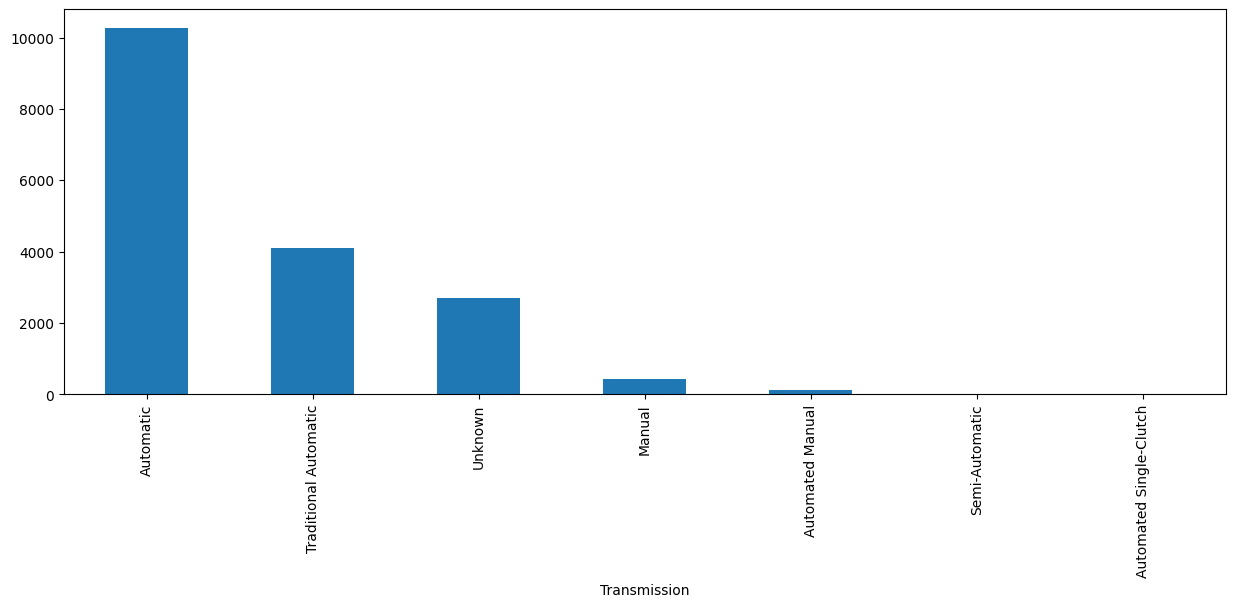

In [20]:
plt.figure(figsize=(15,5))
df['Transmission'].value_counts().plot(kind='bar')

In [21]:
df.drop([' Transmission',' Engine'],axis=1,inplace=True)
df.shape

(17662, 13)

In [22]:
for col in df.select_dtypes(include='object'):
  uc = df[col].nunique()
  print(f'{col}: {uc}')

Make: 5
Model: 7
Body Type: 12
 Drivetrain: 6
 Doors: 4
 Fuel Type: 11
Transmission: 7


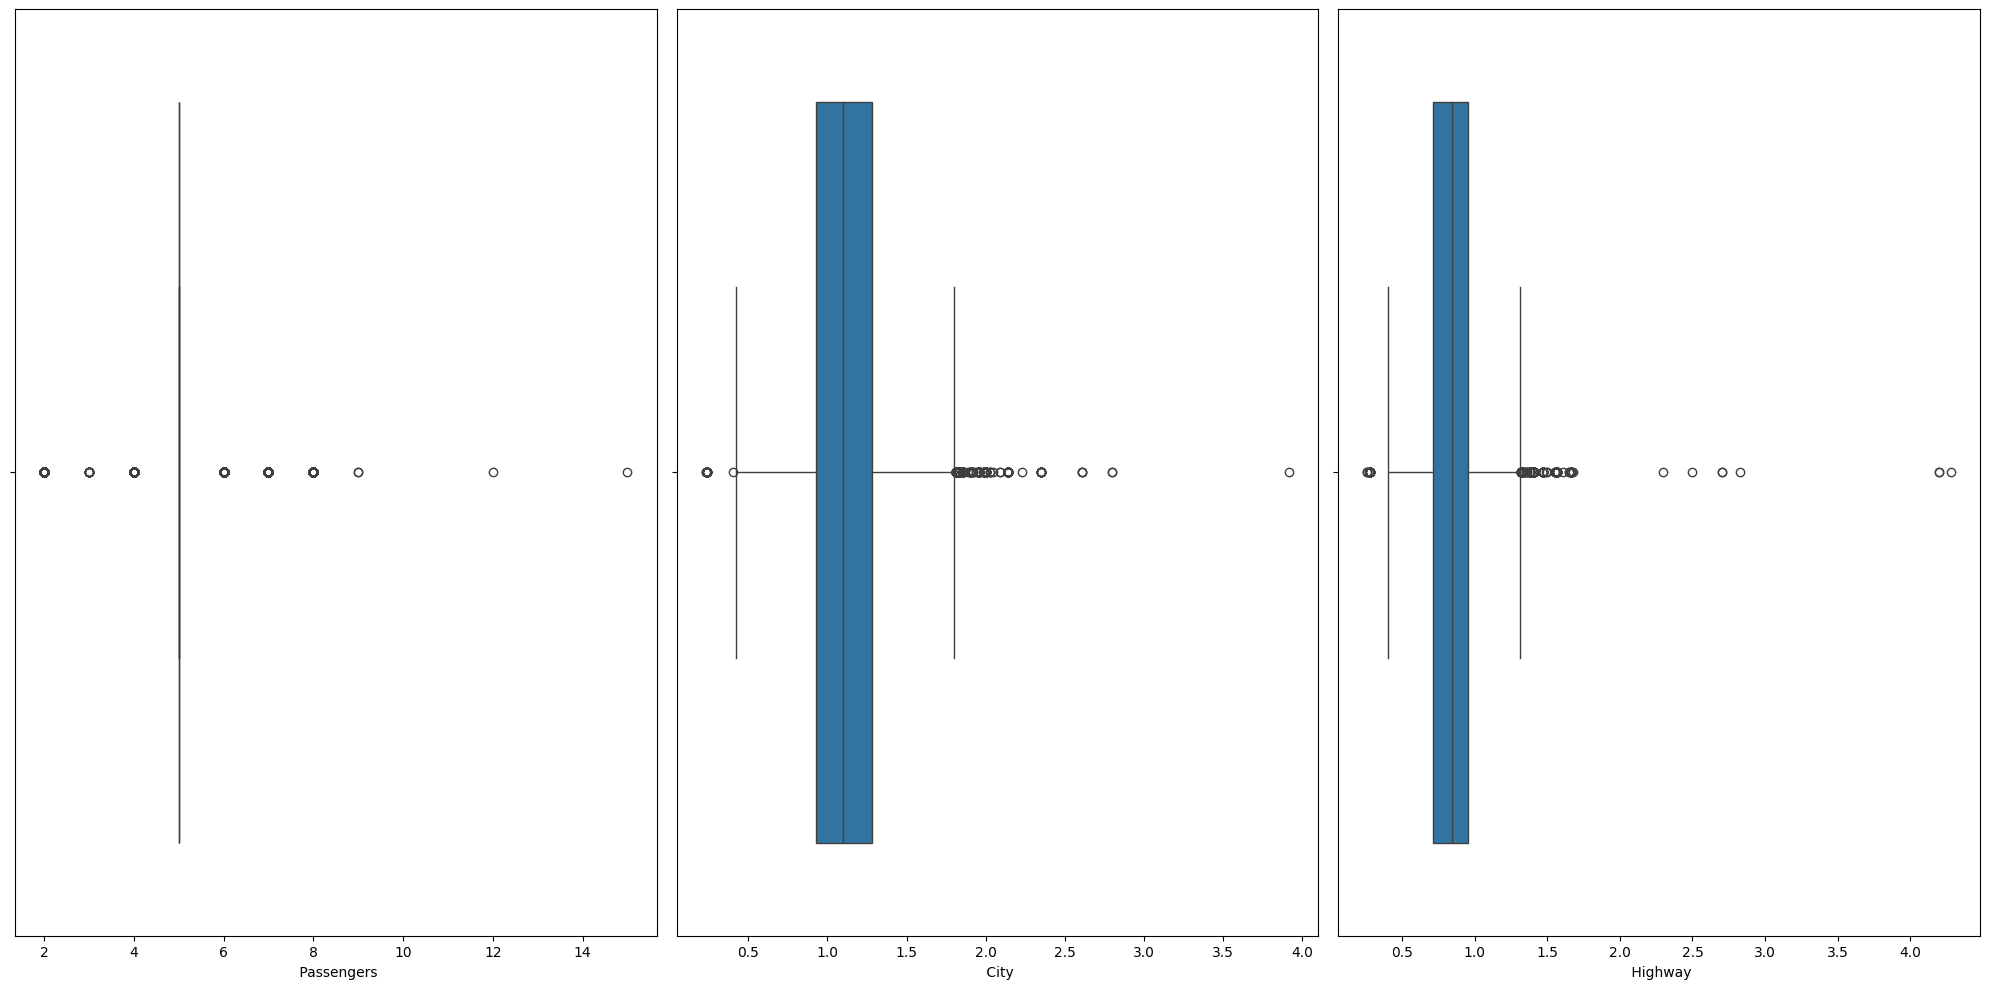

In [23]:
num_vars = [' Passengers', ' City', ' Highway']

fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(20,10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])

fig.tight_layout()
plt.show()

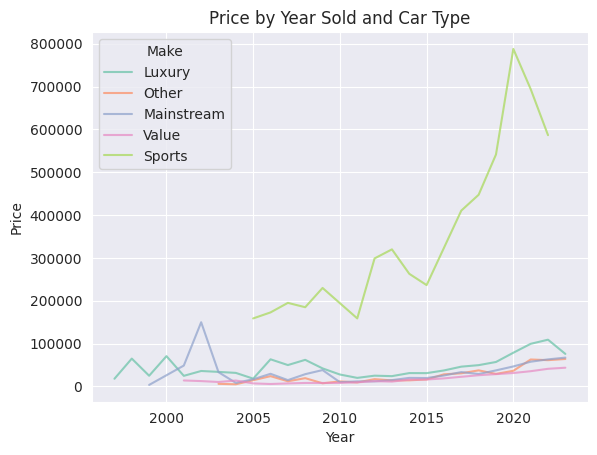

In [24]:
sns.set_style("darkgrid")
sns.set_palette("Set2")

sns.lineplot(x='Year',y='Price', hue='Make', data=df, ci=None, estimator='mean', alpha=0.7)

plt.title("Price by Year Sold and Car Type")
plt.xlabel("Year")
plt.ylabel("Price")

plt.show()

In [25]:
cm = df.isnull().sum()*100/df.shape[0]
cm[cm>0].sort_values(ascending=False)

,0
Passengers,46.342430
Doors,19.805232
Drivetrain,2.276073


In [29]:
df[' Doors'] = pd.to_numeric(df[' Doors'], errors='coerce')
df[' Doors'] = df[' Doors'].fillna(df[' Doors'].median())
df.dropna(subset=[' Drivetrain'],inplace=True)
df.shape

(17260, 12)

In [30]:
df.head()

,Year,Make,Model,Kilometres,Body Type,Drivetrain,Doors,Fuel Type,City,Highway,Price,Transmission
0,2019,Luxury,MDX,53052.0,SUV,AWD,4.0,Gas,1.22,0.90,43880,Traditional Automatic
1,2018,Luxury,MDX,77127.0,SUV,AWD,4.0,Gas,1.26,0.90,36486,Traditional Automatic
2,2019,Luxury,RDX,33032.0,SUV,AWD,4.0,Premium Unleaded,1.10,0.86,40888,Traditional Automatic
3,2020,Luxury,RDX,50702.0,SUV,AWD,4.0,Gas,1.10,0.86,44599,Unknown
4,2021,Luxury,RDX,67950.0,SUV,AWD,4.0,Gas,1.13,0.91,46989,Unknown


In [31]:
for col in df.select_dtypes(include='object'):
  print(f'{col}: {df[col].unique()}')

Make: ['Luxury' 'Other' 'Mainstream' 'Value' 'Sports']
Model: ['MDX' 'RDX' 'TLX' 'Other Model' 'ILX' 'Grand' 'Civic']
Body Type: ['SUV' 'Sedan' 'Hatchback' 'Other' 'Wagon' 'Roadster' 'Truck' 'Compact'
 'Minivan' 'Cabriolet' 'Van' 'Super Crew']
 Drivetrain: ['AWD' 'FWD' 'RWD' '4x4' '4WD' '2WD']
 Fuel Type: ['Gas' 'Premium Unleaded' 'Diesel' 'Gasoline Hybrid' 'Gas/Electric Hybrid'
 'Other' 'Flexible' 'Electric' 'Regular Unleaded' 'Gasoline Fuel'
 'Gaseous Fuel Compatible']
Transmission: ['Traditional Automatic' 'Unknown' 'Automatic' 'Manual' 'Automated Manual'
 'Semi-Automatic' 'Automated Single-Clutch']


In [32]:
df[' Doors'] = df[' Doors'].astype(float)
df.dtypes

,0
Year,int64
Make,object
Model,object
Kilometres,float64
Body Type,object
Drivetrain,object
Doors,float64
Fuel Type,object
City,float64
Highway,float64


In [33]:
from sklearn.preprocessing import LabelEncoder

for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    le.fit(df[col].unique())
    df[col] = le.transform(df[col])
    print(f'{col}: {df[col].unique()}')

Make: [0 2 1 4 3]
Model: [3 5 6 4 2 1 0]
Body Type: [ 6  7  2  4 11  5  9  1  3  0 10  8]
 Drivetrain: [3 4 5 2 1 0]
 Fuel Type: [ 3  9  0  7  4  8  2  1 10  6  5]
Transmission: [5 6 2 3 0 4 1]


In [34]:
from scipy import stats as sts

def remove_outliers(df,cols,threshold=3):
  for col in cols:
    z = np.abs(sts.zscore(df[col]))
    df = df[(z<threshold) | (df[col].isnull())]
  return df

In [36]:
sc = [' City',' Highway']
dfc = remove_outliers(df,sc)
dfc.shape

(17027, 12)

<Axes: >

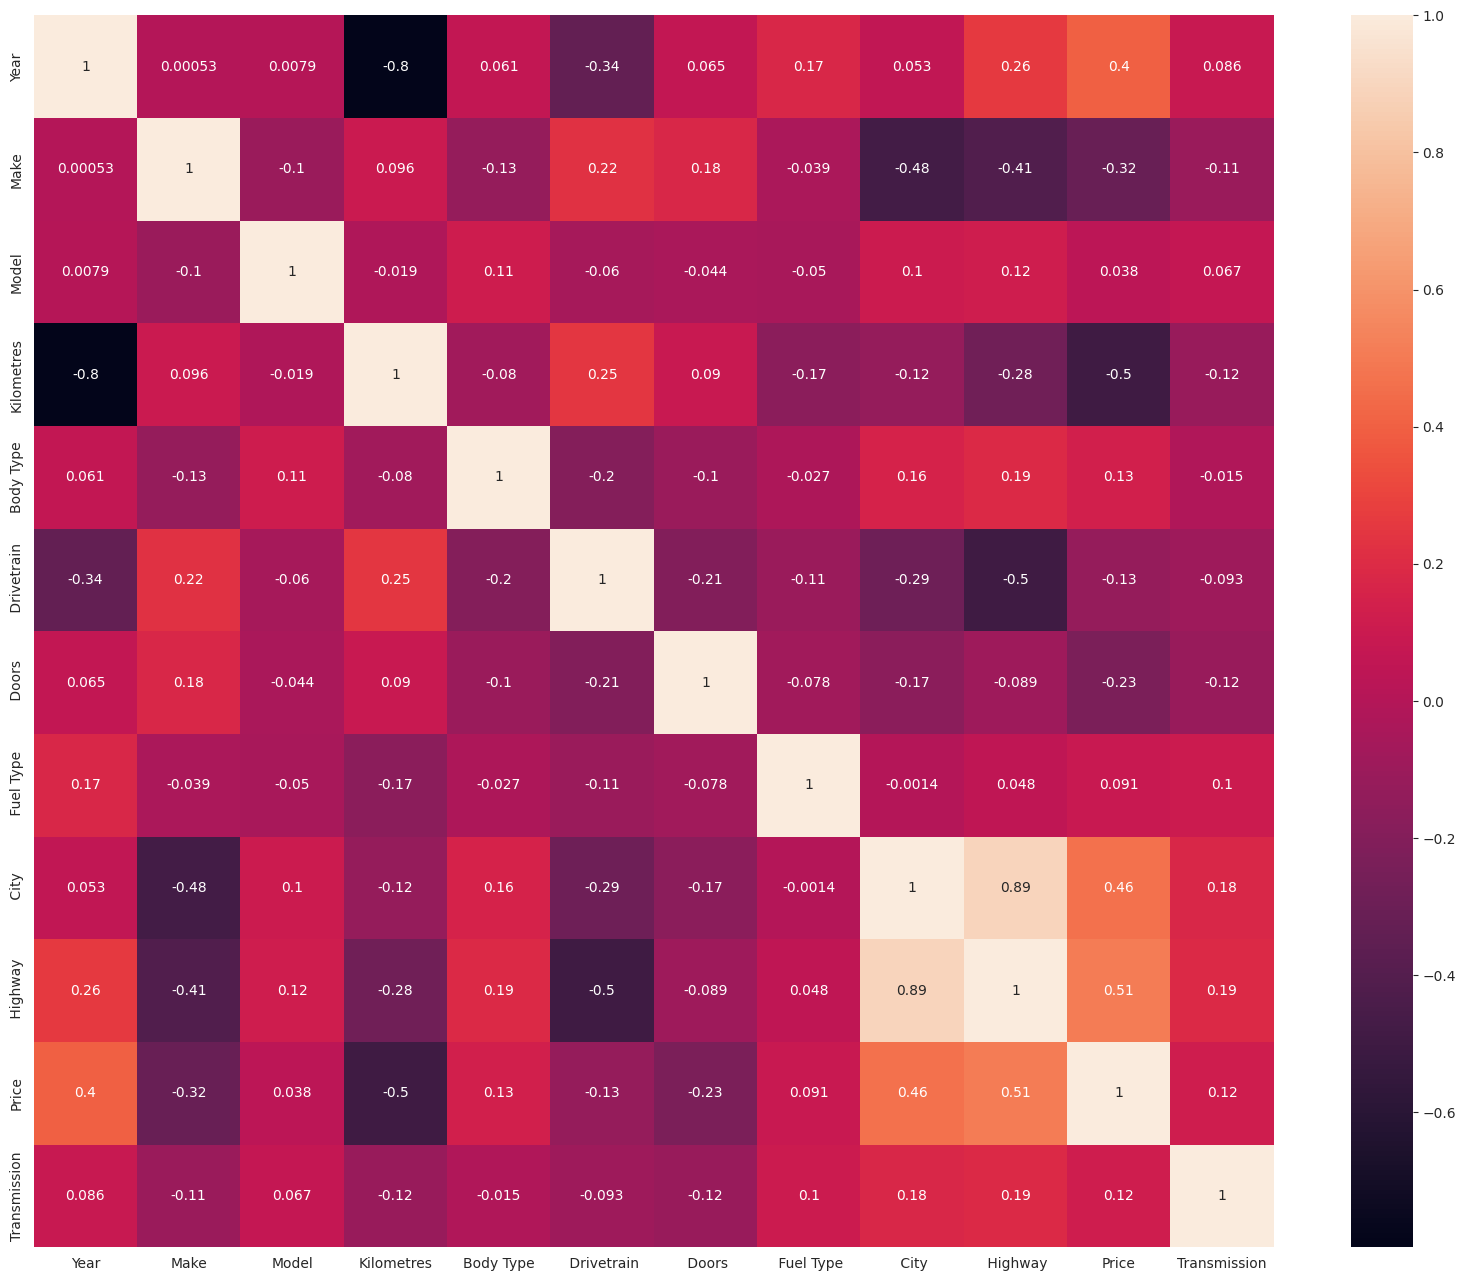

In [37]:
plt.figure(figsize=(20,16))
sns.heatmap(dfc.corr(),fmt='.2g',annot=True)

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = dfc.drop('Price',axis=1)
y = dfc['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [39]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [40]:
dt = DecisionTreeRegressor()
param_grid = {
    'max_depth': [2, 4, 6, 8],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}


In [41]:
dt = DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_leaf=2, min_samples_split=2)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=8, max_features='log2', min_samples_leaf=2)

In [43]:
from sklearn.metrics import mean_absolute_percentage_error

y_pred = dt.predict(x_test)
mae = mean_squared_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

MAE is 248988810.26812074
MAPE is 0.20852561279741272
MSE is 248988810.26812074
R2 score is 0.7951940288035318


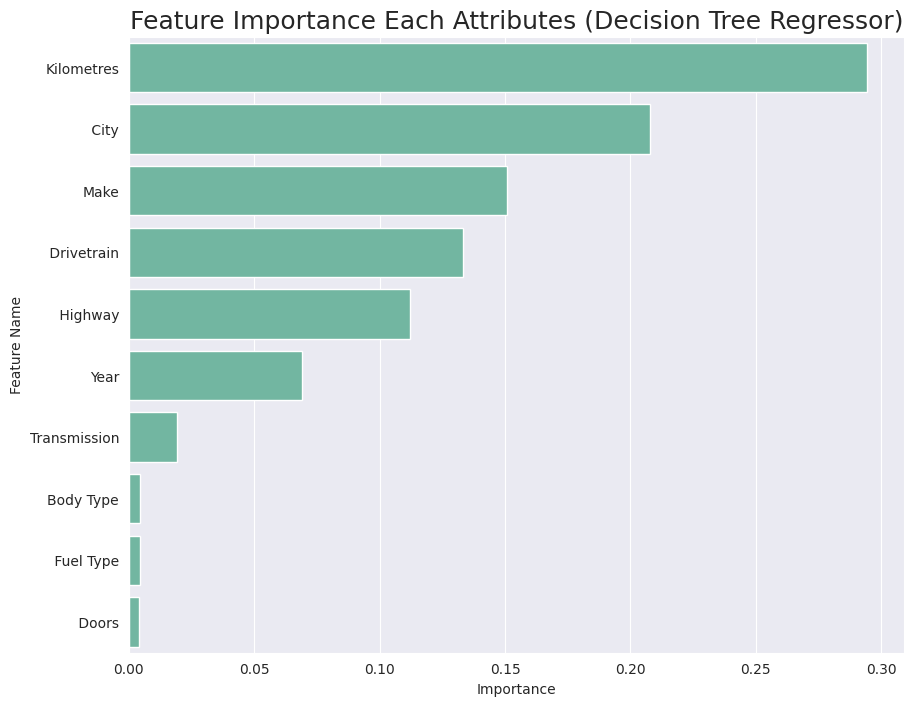

In [46]:
imp_df = pd.DataFrame({
    'features': x_train.columns,
    'importance': dt.feature_importances_
})

fi = imp_df.sort_values(by='importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='importance', y='features')
plt.title('Feature Importance Each Attributes (Decision Tree Regressor)', fontsize=18)
plt.xlabel ('Importance')
plt.ylabel ('Feature Name')
plt.show()

In [47]:
rf = RandomForestRegressor()
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}


In [48]:
rf = RandomForestRegressor(max_depth=9,max_features='sqrt', min_samples_leaf = 1, min_samples_split = 2,random_state=42)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=9, max_features='sqrt', random_state=42)

In [49]:
import math
from sklearn.metrics import mean_absolute_error

y_pred = rf.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 5610.168195850376
MAPE is 0.1544533707699624
MSE is 106549115.54167524
R2 score is 0.9123579285947074
RMSE score is 10322.263101746401


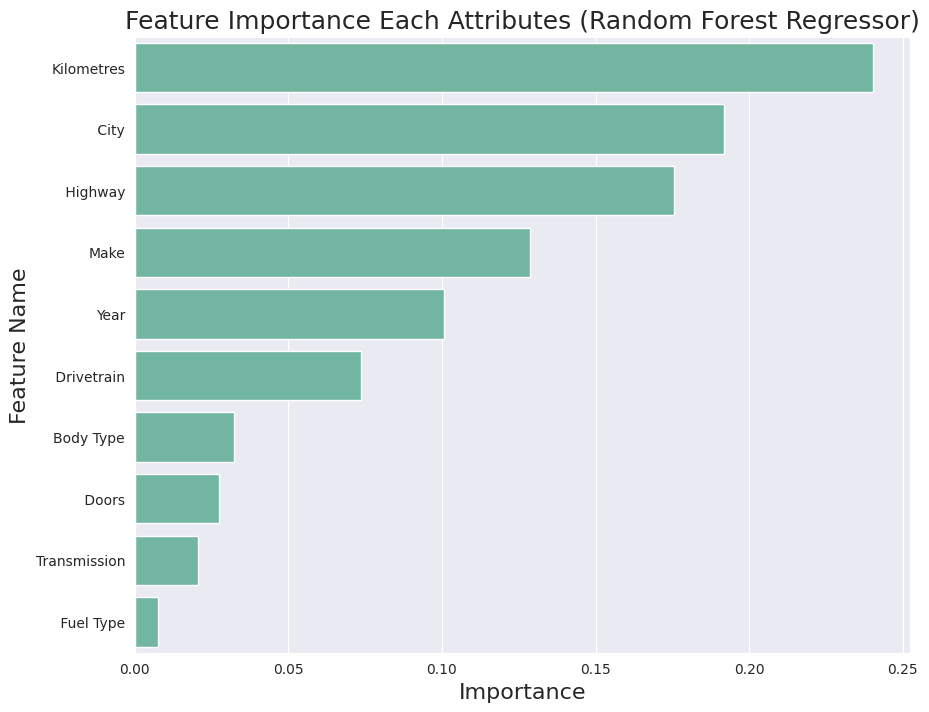

In [51]:
imp_rf = pd.DataFrame({
    'features': x_train.columns,
    'importance': rf.feature_importances_
})

fi = imp_rf.sort_values(by='importance', ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='importance', y='features')
plt.title('Feature Importance Each Attributes (Random Forest Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [52]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

params = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

grid_search = GridSearchCV(estimator=ada, param_grid=params, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)

{'learning_rate': 0.01, 'n_estimators': 200}


In [53]:
ada = AdaBoostRegressor(learning_rate=0.01, n_estimators=200)
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.01, n_estimators=200)

In [54]:
y_pred = ada.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = math.sqrt(mse)

print('MAE is {}'.format(mae))
print('MAPE is {}'.format(mape))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print('RMSE score is {}'.format(rmse))

MAE is 10852.945009207111
MAPE is 0.3334158724704321
MSE is 338928912.9901247
R2 score is 0.7212137159225857
RMSE score is 18410.022080109648


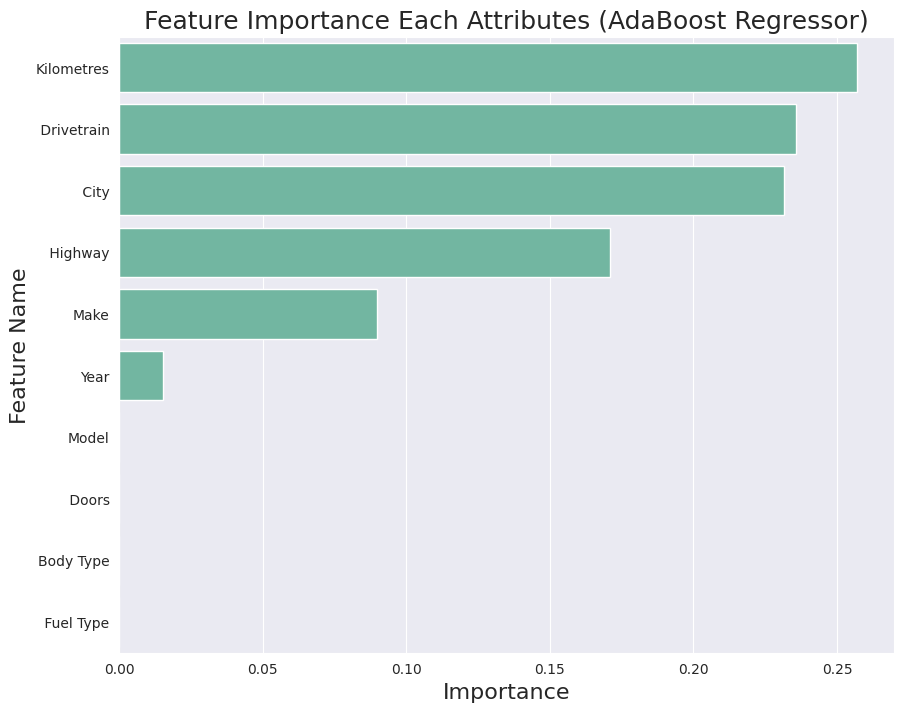

In [55]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": ada.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Feature Importance Each Attributes (AdaBoost Regressor)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()